## Análisis de datos axploratorio - Prueba Técnica Científico de datos TIGO

#### Librerías adicionales
```python
!pip install pyxlsb --quiet
!pip install python-calamine --quiet
!pip install xgboost --quiet
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

In [2]:
datos_prueba = pd.read_excel('../data/202412_base_prueba.xlsb', sheet_name='datos', engine='calamine')
datos_prueba.head()

,User_ID,regional,departamento,ageing,data_usr,TECHNOLOGY,DEVICE_TECHNOLOGY,DEVICE_SUBTYPE,rev_tot,data_mb,...,CANAL,NPS,TESPERA_SEG,TABANDONO_SEG,DURACION_SEG,TIEMPO_AHT,MUNICIPIO,PERFIL_DIGITAL,VECTOR_PAGO,GENERACION_MOVIL
0,1,SUR,QUINDÍO,8,N,4G,4G,ANDROID,1397.00,5697.4,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,625.0,RIOSUCIO,5- ACERTIJO,NaN,NaN
1,2,ANDINA,BOYACÁ,11,Y,4G,2G,IPHONE,32557.92,5910.3,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,164.0,RICAURTE,1- FULL DIGITAL,NaN,NaN
2,3,ANDINA,ANTIOQUIA,9,Y,4G,4G,ANDROID,36565.80,34771.7,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,873.0,COPACABANA,NaN,NaN,NaN
3,4,ANDINA,ANTIOQUIA,21,Y,5G,2G,IPHONE,20589.15,4222.1,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,NaN,MEDELLIN,NaN,NaN,NaN
4,5,COSTA,CÓRDOBA,9,Y,4G,2G,ANDROID,29835.04,4048.7,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,894.0,LORICA,3- HIBRIDO,NaN,NaN


In [3]:
datos_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530559 entries, 0 to 530558
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   User_ID              530559 non-null  int64         
 1   regional             530559 non-null  object        
 2   departamento         530559 non-null  object        
 3   ageing               530559 non-null  int64         
 4   data_usr             530559 non-null  object        
 5   TECHNOLOGY           530559 non-null  object        
 6   DEVICE_TECHNOLOGY    530559 non-null  object        
 7   DEVICE_SUBTYPE       530559 non-null  object        
 8   rev_tot              530559 non-null  float64       
 9   data_mb              530559 non-null  float64       
 10  conteo               94208 non-null   float64       
 11  FECHA_COL_min        94208 non-null   datetime64[ns]
 12  FECHA_COL_max        94208 non-null   datetime64[ns]
 13  CX_CANCELACION

In [4]:
c = ["User_ID","CX_QF", "CX_RECURSO", "CX_QS",
     "CX_PETICION", "CX_INTENCION_RET", "CX_INTENCION_NO_RET"]

correlations = (datos_prueba.select_dtypes(include=["int64", "float64"])
 .fillna(0).drop(columns=c).corr())

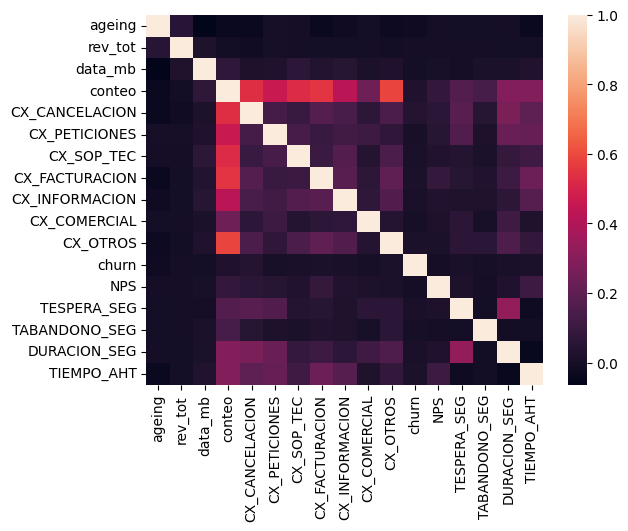

In [5]:
sns.heatmap(correlations, annot=False)
plt.show()

In [6]:
#sns.pairplot(data=datos_prueba, vars=["churn", "ageing", "rev_tot"])

In [7]:
datos_prueba["NPS"].describe()

count    2313.000000
mean        7.408560
std         3.628327
min         0.000000
25%         6.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: NPS, dtype: float64

In [8]:
datos_prueba["NPS"].mean()

7.408560311284047

<Axes: xlabel='NPS_Class'>

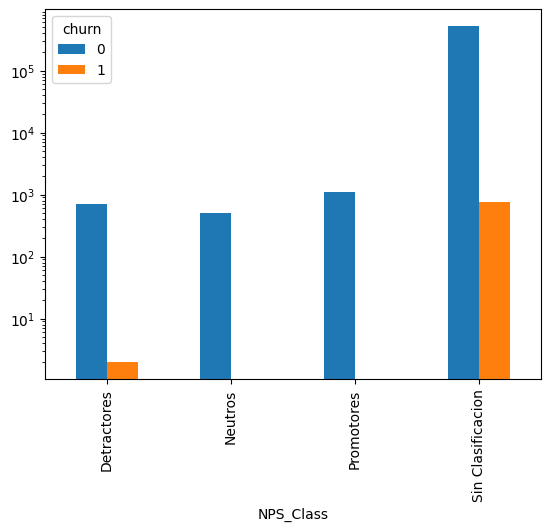

In [9]:
datos_prueba["NPS"] = datos_prueba["NPS"]
conditions = [
    datos_prueba["NPS"].between(0, 7.5),
    datos_prueba["NPS"].between(7.5, 9),
    datos_prueba["NPS"] >= 9
]

values = ["Detractores", "Neutros", "Promotores"]

datos_prueba["NPS_Class"] = np.select(conditions, values, default="Sin Clasificacion")

pd.crosstab(datos_prueba["NPS_Class"], datos_prueba["churn"]).plot(kind="bar",logy=True,rot=90)

<Axes: xlabel='rev_tot', ylabel='NPS_Class'>

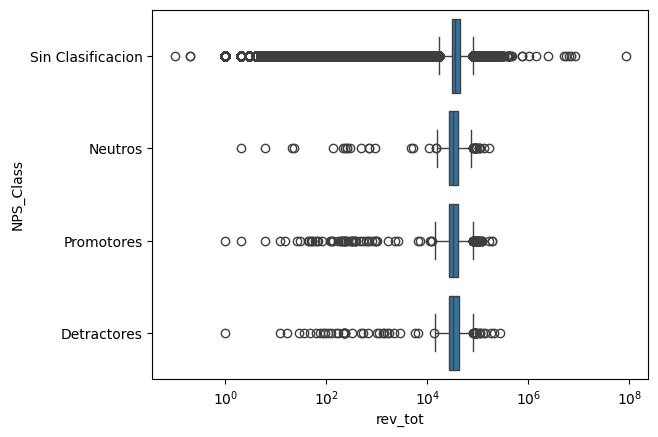

In [10]:
sns.boxplot(data=datos_prueba, x="rev_tot", y="NPS_Class", log_scale=True)

In [11]:
nps_series = datos_prueba["NPS_Class"].value_counts()
nps_kpi_base = (100 * (nps_series["Promotores"] - nps_series["Detractores"]) 
           / (nps_series["Detractores"] + nps_series["Neutros"] + nps_series["Promotores"]))

print(nps_kpi_base)

16.947686986597493


In [12]:
nps_regional = (datos_prueba[["regional", "NPS", "NPS_Class"]]
                .pivot_table(index="regional", columns="NPS_Class", aggfunc="count", fill_value=0))

nps_regional.loc[:, ("NPS","NPS_KPI")] = (100 * (nps_regional.loc[:,("NPS","Promotores")] 
                                                 - nps_regional.loc[:,("NPS","Detractores")]) 
                                                 / nps_regional.loc[:,("NPS",["Detractores","Promotores","Neutros"])]
                                                 .sum(axis=1)).fillna(0)

In [13]:
nps_regional

NPS                                                
NPS_Class        Detractores Neutros Promotores Sin Clasificacion    NPS_KPI
regional                                                                    
ANDINA                   207     131        356                 0  21.469741
BOGOTA                   246     161        324                 0  10.670315
COSTA                    143     125        234                 0  18.127490
SUR                      111      90        185                 0  19.170984
TO BE DETERMINED           0       0          0                 0   0.000000

c:\Users\andre\OneDrive\Documents\Data Science\Pruebas_Tecnicas\tigo\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Axes: xlabel='rev_tot', ylabel='regional'>

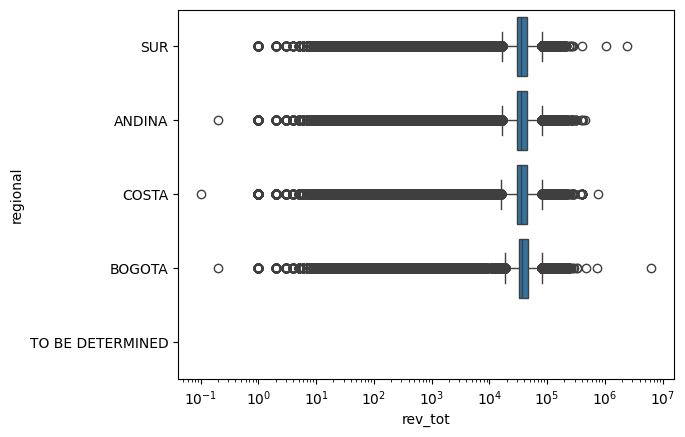

In [14]:
sns.boxplot(data=datos_prueba, x="rev_tot", y="regional", log_scale=True)

In [15]:
df1 = (datos_prueba[["CATEGORIA", "NPS", "NPS_Class"]]
 .pivot_table(index="CATEGORIA", columns="NPS_Class", aggfunc="count", fill_value=0))

In [16]:
df1.loc[:,("NPS",["Detractores","Promotores","Neutros"])]

NPS                   
NPS_Class       Detractores Promotores Neutros
CATEGORIA                                     
ABANDONADA                9          2       0
CANCELACION             161        278     140
COMERCIAL                 8         24      12
CONVERGENCIA              0          0       0
FACTURACION             240        366     178
INFORMACION              48         68      28
OTROS                    33         28       3
PETICIONES               78        184      77
SOPORTE TECNICO         126        145      65

In [17]:
df1.loc[:, ("NPS","NPS_KPI")] = (100 * (df1.loc[:,("NPS","Promotores")] - df1.loc[:,("NPS","Detractores")]) 
                                 / df1.loc[:,("NPS",["Detractores","Promotores","Neutros"])]
                                 .sum(axis=1)).fillna(0)

In [18]:
df1

NPS                                                
NPS_Class       Detractores Neutros Promotores Sin Clasificacion    NPS_KPI
CATEGORIA                                                                  
ABANDONADA                9       0          2                 0 -63.636364
CANCELACION             161     140        278                 0  20.207254
COMERCIAL                 8      12         24                 0  36.363636
CONVERGENCIA              0       0          0                 0   0.000000
FACTURACION             240     178        366                 0  16.071429
INFORMACION              48      28         68                 0  13.888889
OTROS                    33       3         28                 0  -7.812500
PETICIONES               78      77        184                 0  31.268437
SOPORTE TECNICO         126      65        145                 0   5.654762

In [19]:
datos_prueba["MES_CONTACTO"] = datos_prueba["FECHA_COL"].dt.month
contact_index = (datos_prueba.groupby("MES_CONTACTO")
                 .agg(contactos_mes=("conteo","sum"),
                      clientes_activos=("User_ID","nunique"))
                 .assign(contact_index = lambda x: x["contactos_mes"] / x["clientes_activos"]))
contact_index

,contactos_mes,clientes_activos,contact_index
MES_CONTACTO,,,
6.0,106455.0,34205,3.112264
7.0,100093.0,34553,2.896796


<Axes: xlabel='CATEGORIA'>

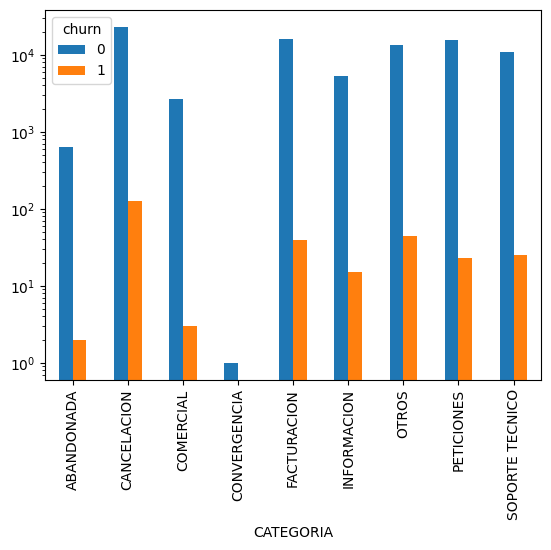

In [20]:
pd.crosstab(datos_prueba["CATEGORIA"], datos_prueba["churn"]).plot(kind="bar",logy=True,rot=90)

In [21]:
nps_series_regional = datos_prueba.groupby("regional", as_index=False)["NPS_Class"].value_counts()
nps_series_regional.set_index("regional")

,NPS_Class,count
regional,,
ANDINA,Sin Clasificacion,158344
ANDINA,Promotores,356
ANDINA,Detractores,207
ANDINA,Neutros,131
BOGOTA,Sin Clasificacion,135748
BOGOTA,Promotores,324
BOGOTA,Detractores,246
BOGOTA,Neutros,161
COSTA,Sin Clasificacion,148646


In [22]:
datos_prueba["NPS"].isnull().sum()

528246

In [23]:
datos_prueba.columns

Index(['User_ID', 'regional', 'departamento', 'ageing', 'data_usr',
       'TECHNOLOGY', 'DEVICE_TECHNOLOGY', 'DEVICE_SUBTYPE', 'rev_tot',
       'data_mb', 'conteo', 'FECHA_COL_min', 'FECHA_COL_max', 'CX_CANCELACION',
       'CX_PETICIONES', 'CX_SOP_TEC', 'CX_FACTURACION', 'CX_INFORMACION',
       'CX_COMERCIAL', 'CX_OTROS', 'CX_QF', 'CX_RECURSO', 'CX_QS',
       'CX_PETICION', 'CX_INTENCION_RET', 'CX_INTENCION_NO_RET', 'churn',
       'FECHA_COL', 'CATEGORIA', 'CANAL', 'NPS', 'TESPERA_SEG',
       'TABANDONO_SEG', 'DURACION_SEG', 'TIEMPO_AHT', 'MUNICIPIO',
       'PERFIL_DIGITAL', 'VECTOR_PAGO', 'GENERACION_MOVIL', 'NPS_Class',
       'MES_CONTACTO'],
      dtype='object')

In [24]:
t2 = pd.crosstab(datos_prueba["DEVICE_SUBTYPE"], datos_prueba["churn"])
100* (t2[1] / (t2[0] + t2[1]))

DEVICE_SUBTYPE
ANDROID                 0.155678
BLACKBERRY              0.000000
DATACARD                0.000000
FEATURE PHONE           0.746269
IPHONE                  0.100633
LAPTOP / NETBOOK        2.702703
LOW END                 0.000000
MIFI                    0.000000
OTHER MODEM             0.000000
OTHER NETWORK DEVICE    0.000000
OTHER SMARTPHONE        0.123326
ROUTER                  0.000000
TABLET                  0.000000
WIRELESS MODULE         0.000000
dtype: float64

<Axes: xlabel='DEVICE_SUBTYPE'>

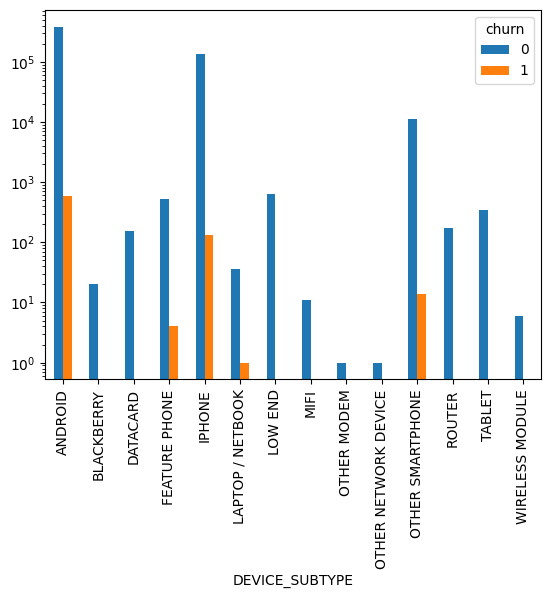

In [25]:
t2.plot(kind="bar",logy=True,rot=90)

c:\Users\andre\OneDrive\Documents\Data Science\Pruebas_Tecnicas\tigo\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Axes: xlabel='rev_tot', ylabel='DEVICE_SUBTYPE'>

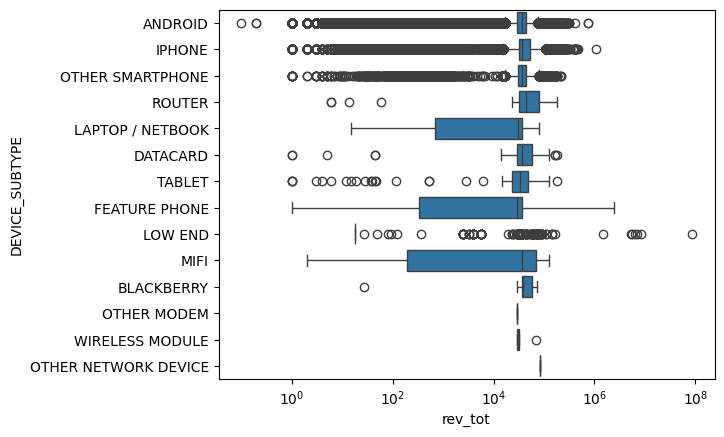

In [26]:
sns.boxplot(data=datos_prueba, x="rev_tot", y="DEVICE_SUBTYPE", log_scale=True)

In [27]:
t1 = pd.crosstab(datos_prueba["regional"], datos_prueba["churn"])

<Axes: xlabel='regional'>

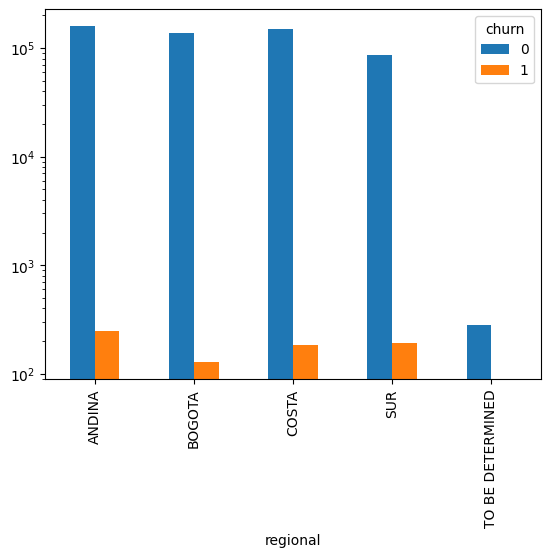

In [28]:
t1.plot(kind="bar",logy=True,rot=90)

<Axes: title={'center': 'Distribución del % de usuarios que hacen churn por regiones'}, xlabel='regional'>

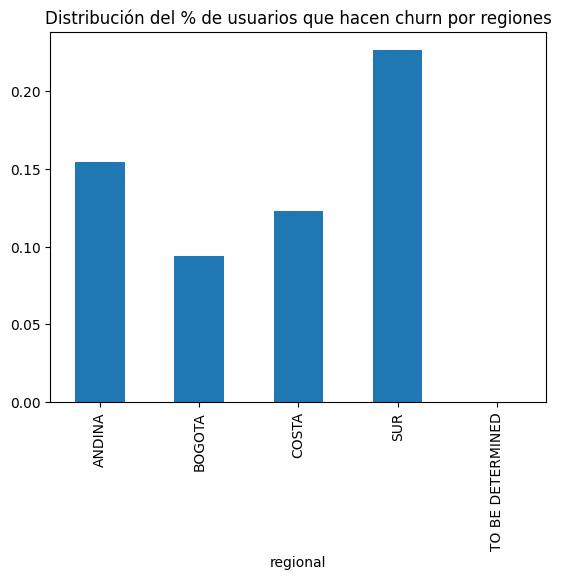

In [29]:
fraccion_churn_region = 100 * (t1[1] / (t1[0] + t1[1]))
fraccion_churn_region.plot(kind="bar", rot=90, title='Distribución del % de usuarios que hacen churn por regiones')

Para efectos de lograr una visualización que sea interpretable se presenta un gráfico con una escala logaritmica en el eje y para apreciar el nivel de churn por departamento.

<Axes: xlabel='VECTOR_PAGO'>

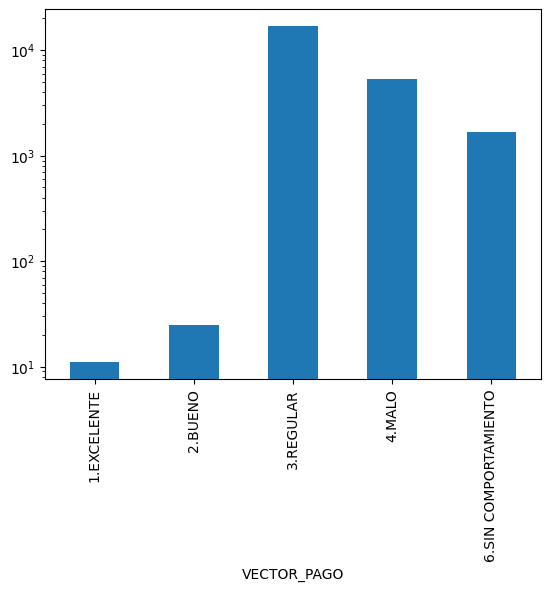

In [30]:
datos_prueba["VECTOR_PAGO"].value_counts().sort_index().plot(kind="bar",logy=True,rot=90)

<Axes: xlabel='VECTOR_PAGO'>

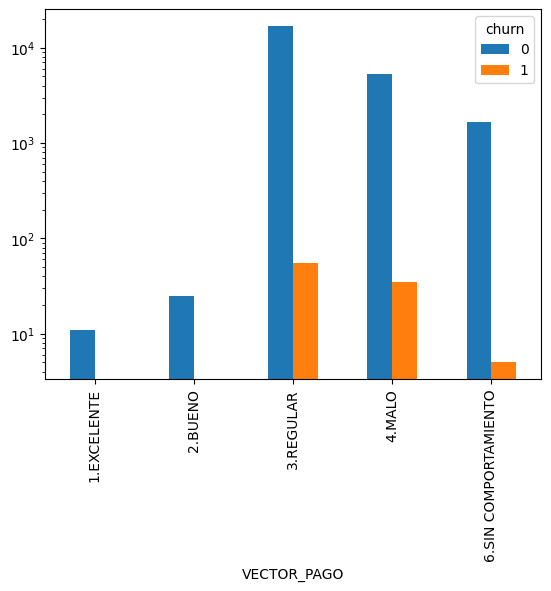

In [31]:
pd.crosstab(datos_prueba["VECTOR_PAGO"], datos_prueba["churn"]).plot(kind="bar",logy=True,rot=90)

<Axes: xlabel='departamento'>

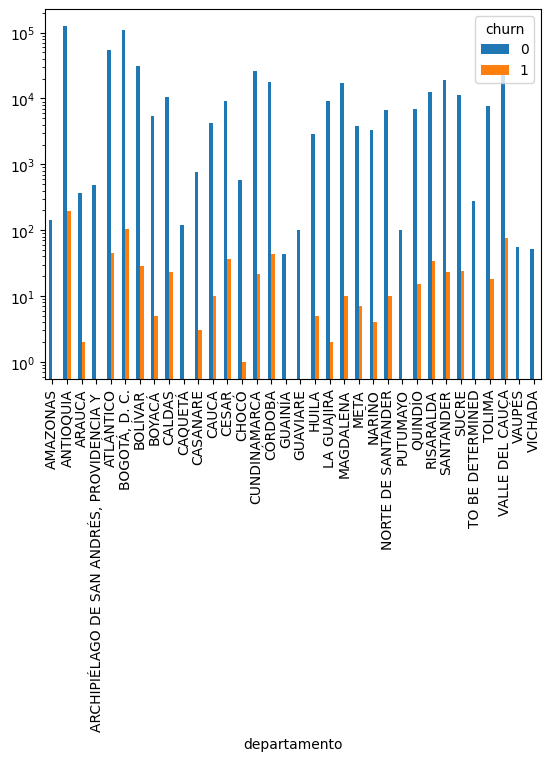

In [32]:
pd.crosstab(datos_prueba["departamento"], datos_prueba["churn"]).plot(kind="bar",logy=True,rot=90)

NPS                    99.564045
VECTOR_PAGO            95.503233
GENERACION_MOVIL       91.944911
PERFIL_DIGITAL         89.778894
CATEGORIA              83.383186
TIEMPO_AHT             82.873535
MUNICIPIO              82.499779
MES_CONTACTO           82.492993
DURACION_SEG           82.492993
TABANDONO_SEG          82.492993
TESPERA_SEG            82.492993
CANAL                  82.492993
FECHA_COL              82.492993
CX_INTENCION_NO_RET    82.243634
conteo                 82.243634
FECHA_COL_min          82.243634
CX_PETICION            82.243634
CX_QS                  82.243634
CX_RECURSO             82.243634
CX_QF                  82.243634
CX_OTROS               82.243634
CX_COMERCIAL           82.243634
CX_INFORMACION         82.243634
CX_FACTURACION         82.243634
CX_SOP_TEC             82.243634
CX_PETICIONES          82.243634
CX_CANCELACION         82.243634
FECHA_COL_max          82.243634
CX_INTENCION_RET       82.243634
dtype: float64


<Axes: >

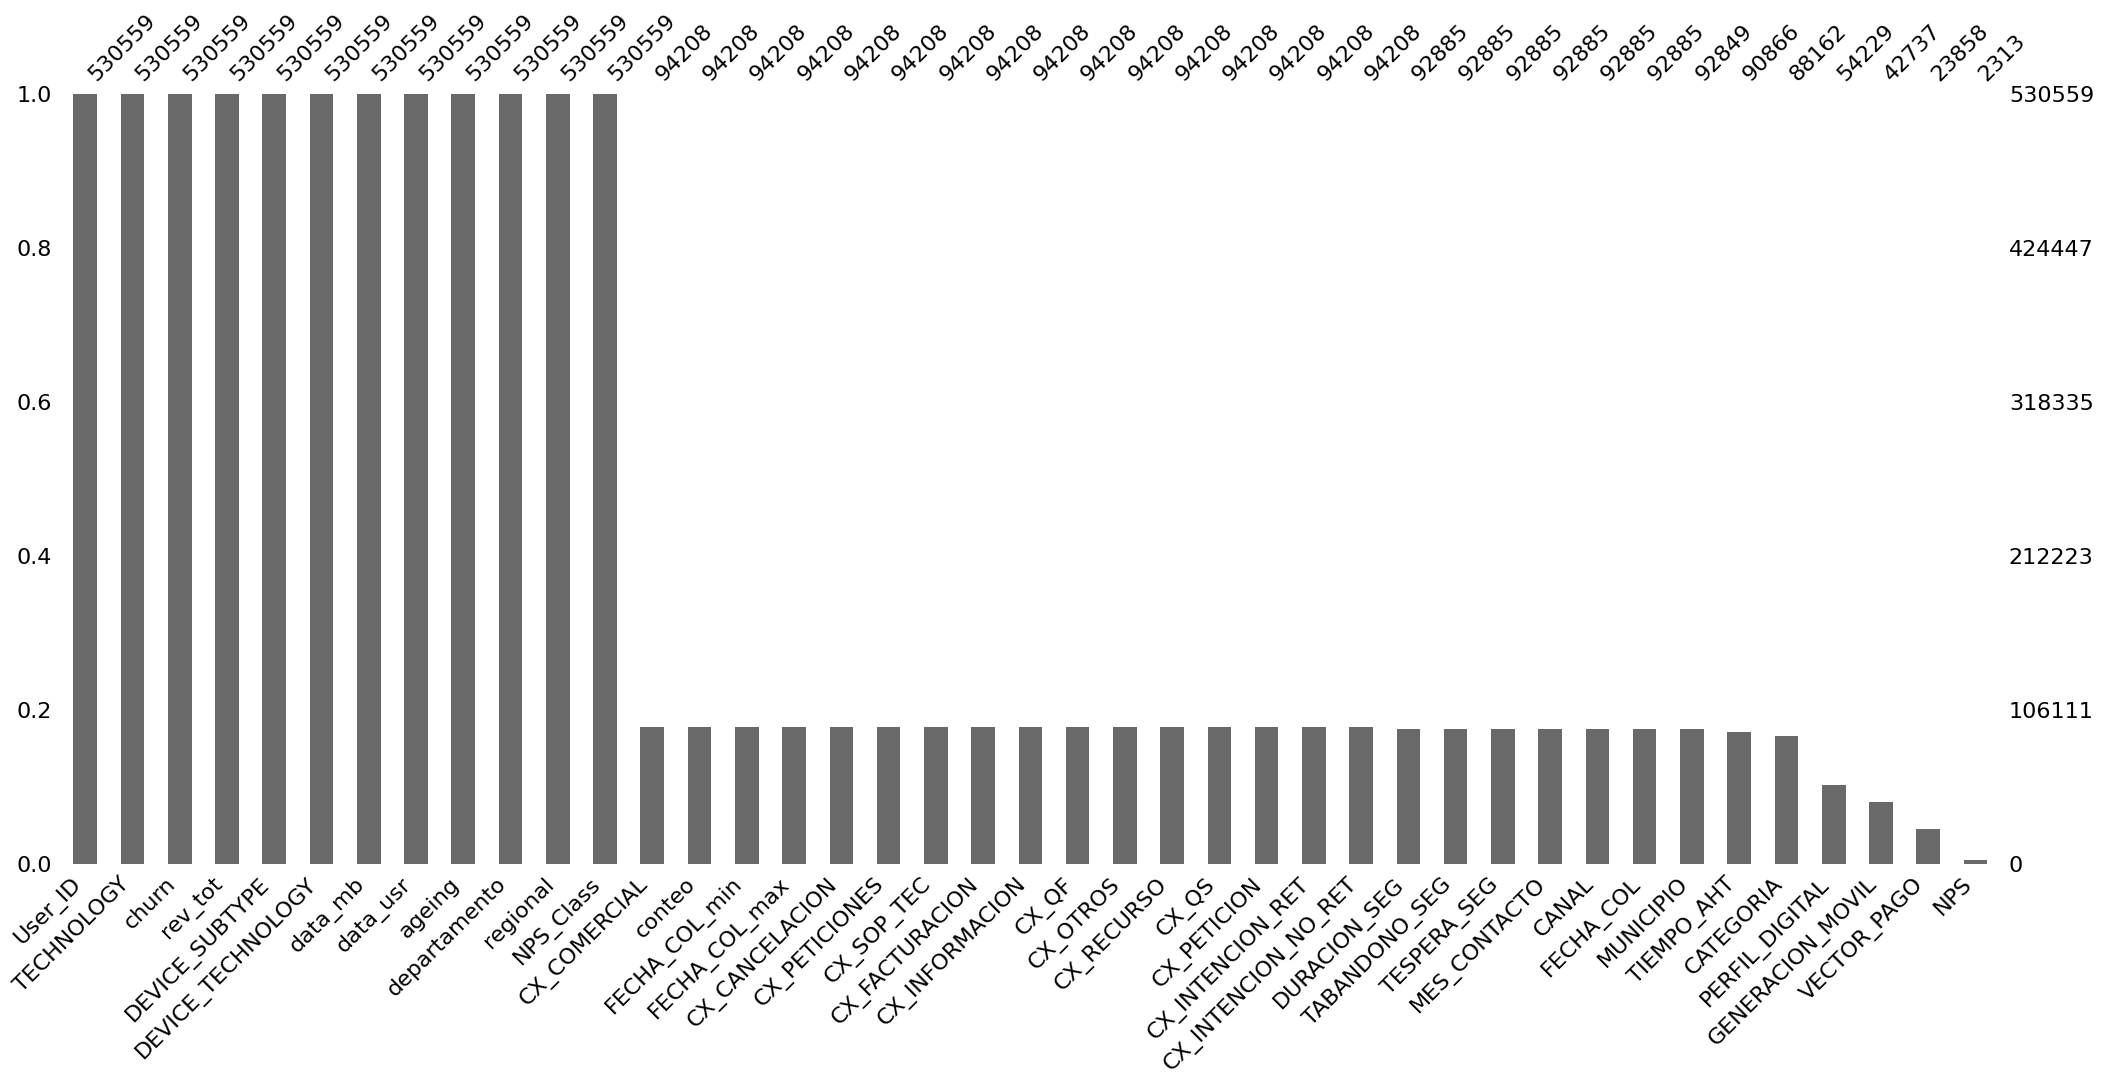

In [33]:
import missingno as msno

missing_data = datos_prueba.isnull().mean() * 100
print(missing_data[missing_data > 0].sort_values(ascending=False))

# Visualización de los valores faltantes
msno.bar(datos_prueba, sort="descending")

## Entrenamiento del modelo

In [34]:
from sklearn.feature_selection import VarianceThreshold

datos_prueba["NPS"] = datos_prueba["NPS"].fillna(-1)

df_sample = datos_prueba.sample(frac=0.05, random_state=42)

X_sample = df_sample.drop(columns=['User_ID','churn']).select_dtypes(include=[float, int])
# Eliminar variables con baja varianza
selector = VarianceThreshold(threshold=0.01)
X_high_variance = selector.fit_transform(X_sample)

# Nuevas columnas con alta varianza
columns_kept = X_sample.columns[selector.get_support()]
print(columns_kept)

Index(['ageing', 'rev_tot', 'data_mb', 'conteo', 'CX_CANCELACION',
       'CX_PETICIONES', 'CX_SOP_TEC', 'CX_FACTURACION', 'CX_INFORMACION',
       'CX_COMERCIAL', 'CX_OTROS', 'NPS', 'TESPERA_SEG', 'TABANDONO_SEG',
       'DURACION_SEG', 'TIEMPO_AHT', 'MES_CONTACTO'],
      dtype='object')


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [36]:
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Escenario 1: Random Forest con oversampling de la clase minoritaria 

In [37]:
X = datos_prueba[columns_kept].select_dtypes(include=[int, float]).fillna(0)
y = datos_prueba['churn']
smote = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_res, y_res)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    158936
           1       0.01      0.12      0.03       232

    accuracy                           0.99    159168
   macro avg       0.51      0.55      0.51    159168
weighted avg       1.00      0.99      0.99    159168



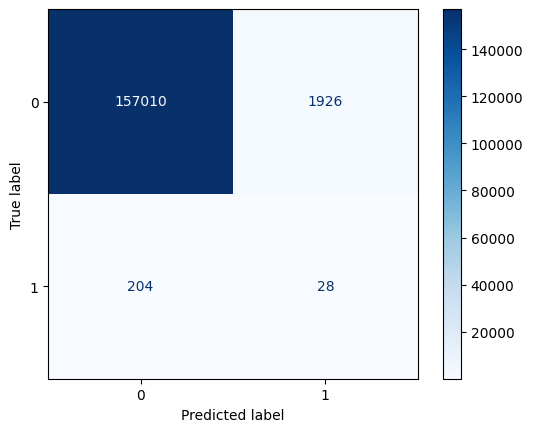

In [38]:
ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred, cmap='Blues')
plt.show()

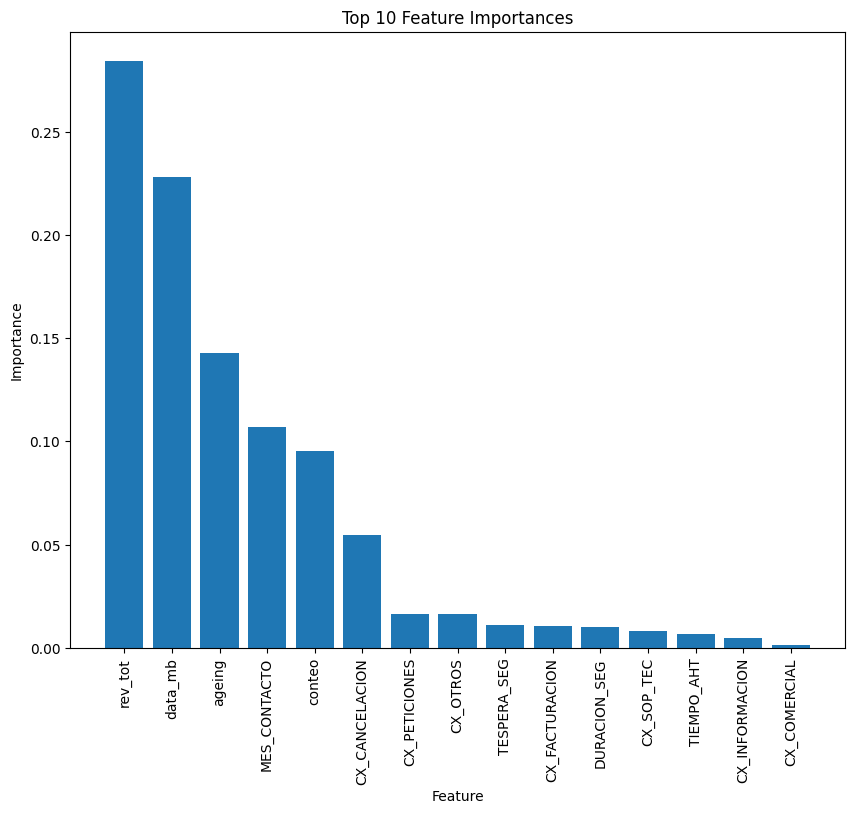

In [39]:
#model = pipeline.named_steps['classifier']
feature_importances = clf.feature_importances_

# Get feature names
feature_names = X.columns.to_list()

# Plot feature importances
indices = np.argsort(feature_importances)[::-1][:15]
plt.figure(figsize=(10, 8))
plt.bar(range(len(indices)), feature_importances[indices], align='center')
plt.xticks(range(len(indices)), np.array(feature_names)[indices], rotation=90)

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()

### Escenario 2: XGBoost con Pesos Ajustados

In [40]:
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier

In [41]:
X = datos_prueba.drop(columns=['User_ID','churn']).select_dtypes(include=[int, float]).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

xgb_class = XGBClassifier(
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    eval_metric="logloss",
    random_state=42
)


pipeline = ImbPipeline([
    # Step 1: Impute missing values
    ('imputer', SimpleImputer(strategy='mean')),
    
    # Step 2: Feature scaling
    ('scaler', StandardScaler()),
    
    # Step 3: Classifier
    ('classifier', xgb_class)
])

# Cross-validation to evaluate performance
scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=5)
print("Cross-validation F1 score:", scores.mean())

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate on the test set
test_score = pipeline.score(X_test, y_test)
print("Test set accuracy:", test_score)
print(classification_report(y_test, pipeline.predict(X_test)))

Cross-validation F1 score: 0.021023874113436054
Test set accuracy: 0.9487899577804584
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    105962
           1       0.01      0.37      0.02       150

    accuracy                           0.95    106112
   macro avg       0.50      0.66      0.50    106112
weighted avg       1.00      0.95      0.97    106112



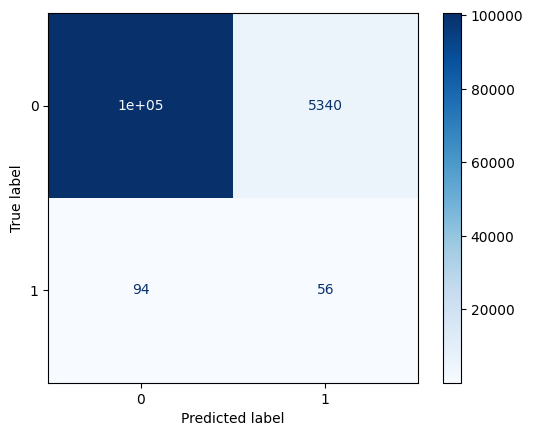

In [42]:
ConfusionMatrixDisplay.from_predictions(
   y_test, pipeline.predict(X_test), cmap='Blues')
plt.show()

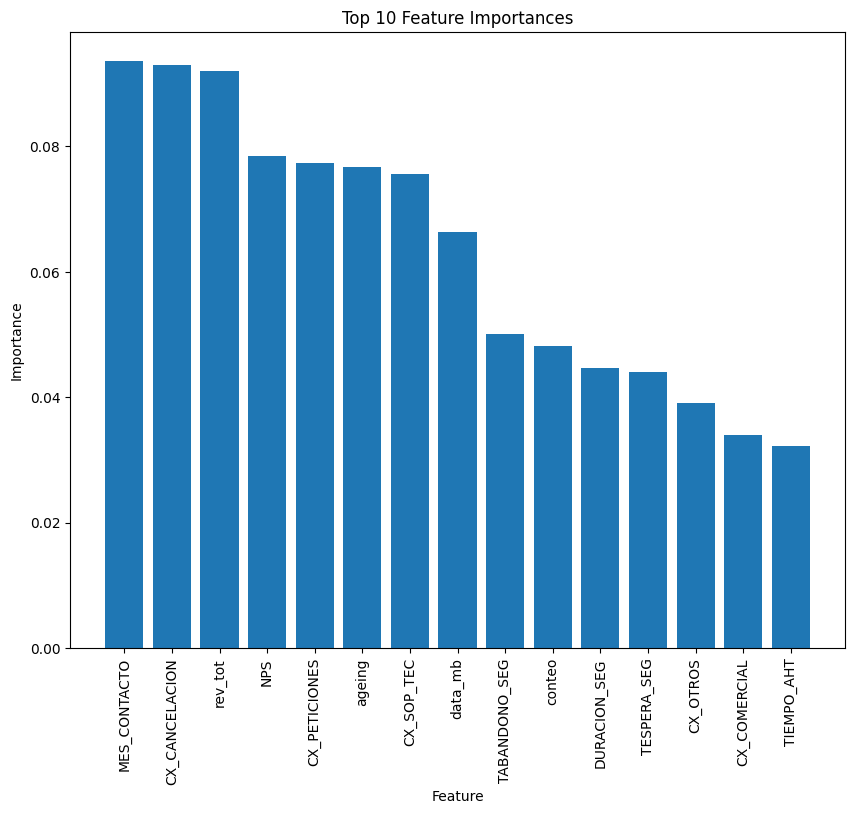

In [43]:
model = pipeline.named_steps['classifier']
feature_importances = model.feature_importances_

# Get feature names
feature_names = X.columns.to_list()

# Plot feature importances
indices = np.argsort(feature_importances)[::-1][:15]
plt.figure(figsize=(10, 8))
plt.bar(range(len(indices)), feature_importances[indices], align='center')
plt.xticks(range(len(indices)), np.array(feature_names)[indices], rotation=90)

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()

### Escenario 3: Random Forest Balanceado

In [44]:
X = datos_prueba.drop(columns=['User_ID','churn']).select_dtypes(include=[int, float]).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

bal_rf = BalancedRandomForestClassifier(
    n_estimators=100,
    random_state=42,
    sampling_strategy="auto",  # Automatically balance the minority class
    max_depth=None,
    replacement=True,
    bootstrap=False

)

pipeline = ImbPipeline([
    # Step 1: Impute missing values
    ('imputer', SimpleImputer(strategy='mean')),
    
    # Step 2: Feature scaling
    ('scaler', StandardScaler()),
    
    # Step 3: Classifier
    ('classifier', bal_rf)
])

# Cross-validation to evaluate performance
scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=5)
print("Cross-validation F1 score:", scores.mean())

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate on the test set
test_score = pipeline.score(X_test, y_test)
print("Test set accuracy:", test_score)
print(classification_report(y_test, pipeline.predict(X_test)))

Cross-validation F1 score: 0.00700548655958075
Test set accuracy: 0.7197018244873341
              precision    recall  f1-score   support

           0       1.00      0.72      0.84    105962
           1       0.00      0.79      0.01       150

    accuracy                           0.72    106112
   macro avg       0.50      0.76      0.42    106112
weighted avg       1.00      0.72      0.84    106112



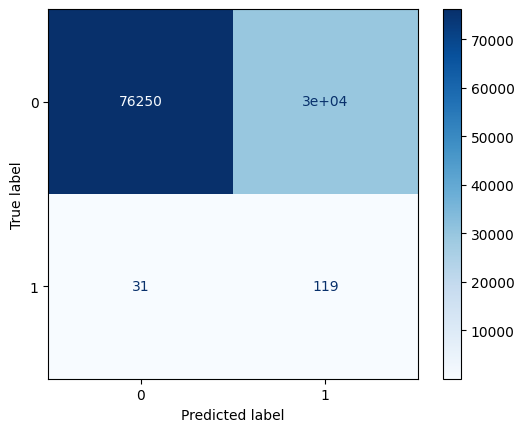

In [45]:
ConfusionMatrixDisplay.from_predictions(
   y_test, pipeline.predict(X_test), cmap='Blues')
plt.show()

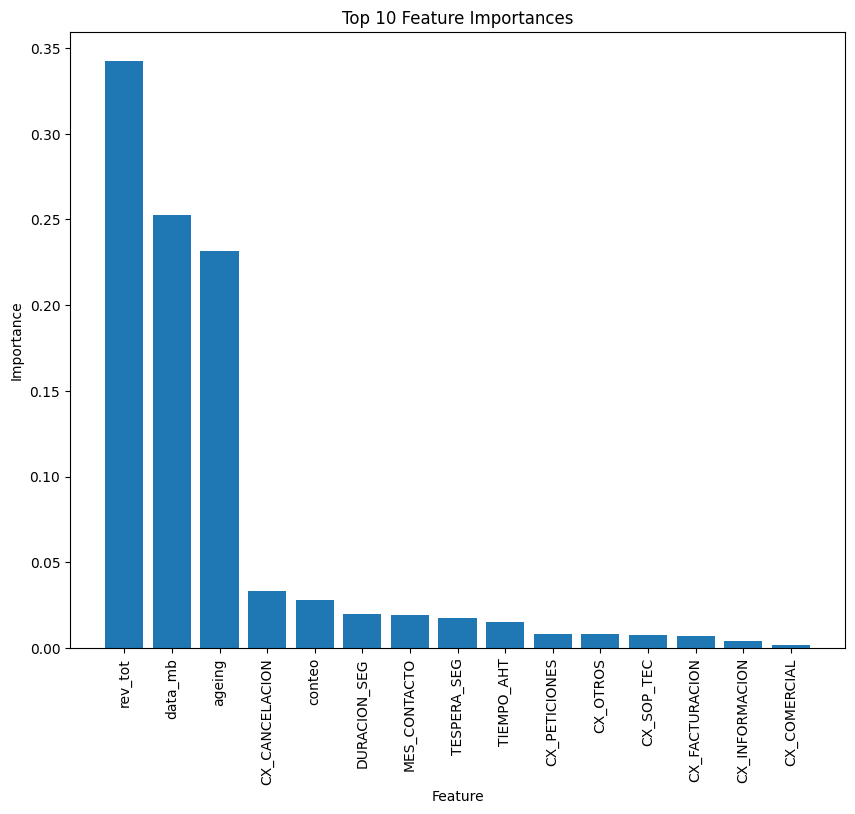

In [46]:
model = pipeline.named_steps['classifier']
feature_importances = model.feature_importances_

# Get feature names
feature_names = X.columns.to_list()

# Plot feature importances
indices = np.argsort(feature_importances)[::-1][:15]
plt.figure(figsize=(10, 8))
plt.bar(range(len(indices)), feature_importances[indices], align='center')
plt.xticks(range(len(indices)), np.array(feature_names)[indices], rotation=90)

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()